# Animation avec matplotlib

In [81]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

L'animation avec matplotlib et la classe FuncAnimation repose sur le principe suivant :

- On choisit la taille et les caractéristiques de sa figure (fig = plt.figure() et ax = plt.axes())
- On initialise les "lines", ce sont les tracés sur la figure que nous allons animer
- On définit la fonction init(), on y place les éléments que l'on va lire une fois au début de l'animatioh
- On définit la fonction animate() qui va être lue à chaque frame et qui prend pour argument le numéro de la frame
- On associe FuncAnimation à une variable
- On sauvegarde ou on lit avec HTML(anim.to_html5_video()) la variable (notée anim ici) associée à FuncAnimation

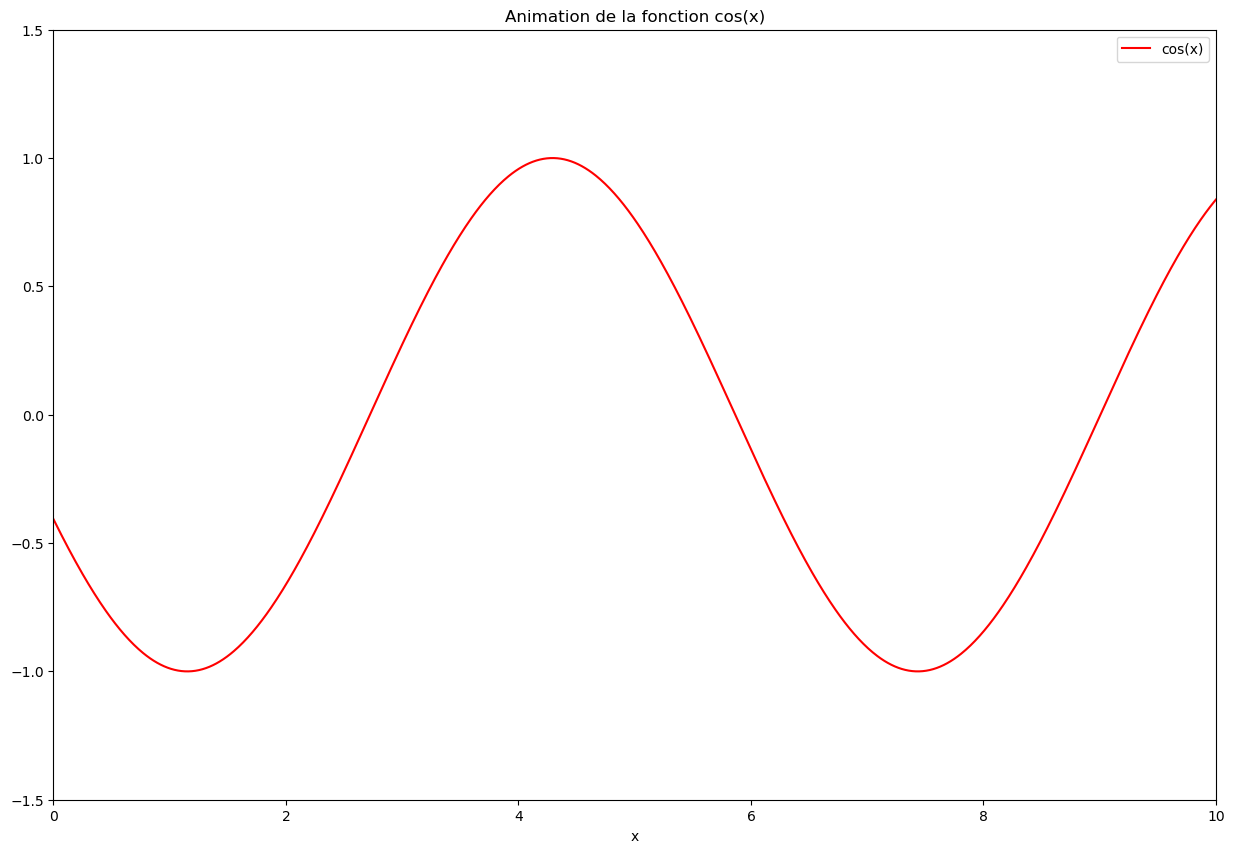

In [83]:
 #Initialisation des tailles de la figure
fig, ax = plt.subplots(figsize=(15,10))

#On définit les "lines" qui servent à tracer les données, à ne pas mettre dans init() car les lines ne seraient défini que localement dans init()
line, = ax.plot([], [], color="red", label = "cos(x)")

#On fait apparaitre les labels
ax.legend()

#Fonction d'initialisation de la figure qui sera lu une fois au lancement de l'animation
def init():
    #Titre de la figure, label de l'axe x et limites de la figure
    ax.set_title("Animation de la fonction cos(x)")
    ax.set_xlabel("x")    
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.5, 1.5)
    return line,

#Fonction servant à tracer les lignes, elle est lue à chaque frame avec t += 1 à chaque nouvelle frame
def animate(t):
    x = np.linspace(0,10,1000)
    y = np.cos(x+t*0.01)
    line.set_data(x,y) #On update le tracé de line
    return line,

#FuncAnimation(nom_de_la_figure, fonction qui update les frames, init_func = fonction d'initialisation lue une fois au début, interval = intervalle entre les frames, frames=nombre de frame total pour l'animation, blit=défini si on redessine les éléments de l'image non-modifié à chaque frame)
anim = FuncAnimation(fig, animate, init_func = init, interval=10, blit=False, frames=200)
HTML(anim.to_html5_video())

# Animation d'un pacquet d'onde recontrant un potentiel, tiré de : https://github.com/louishrm/Quantum-Tunneling/blob/main/QM%20Tunnelling.ipynb

In [84]:
class Gaussian_Wave:
    
    def __init__(self, N_grid, L, a, V0, w, x0, k0,sigma,t):
        
        self.t=t
        self.L=L
        self.N_grid = N_grid
        
        self.x = np.linspace(0,self.L,self.N_grid+1) #grid of points
        self.dx = self.x[1]-self.x[0] #grid point spacing or 'discrete' analogue of the differential length
        
        
        def integral(f,axis = 0):
            """This function allows us to approximate integrals in discrete space"""
            return np.sum(f*self.dx, axis = axis)
        
        
        self.Psi0  = np.exp( -1/2* (self.x[1:-1]-x0)**2/sigma**2) *np.exp(1j*k0*self.x[1:-1]) 
        #use this range for x because as mentionned, we need the wavefunction to be 0 at the endpoints of the grid. 
        
        
        #normalise the initial state
        norm  = integral(np.abs(self.Psi0)**2)
        self.Psi0 = self.Psi0/np.sqrt(norm)
        
        #kinetic energy
        self.T = -1/2 * 1/self.dx**2 * (np.diag(-2*np.ones(self.N_grid-1))+ np.diag(np.ones(self.N_grid-2),1)+ np.diag(np.ones(self.N_grid-2),-1))
        
        #potential as a flat array
        self.V_flat = np.array([V0 if a< pos < a+w else -0.01 for pos in self.x[1:-1]])
        
        #potential energy as a diagonal matrix
        self.V = np.diag(self.V_flat)
        
        #Hamiltonian
        self.H = self.T+self.V
        
        
    #solve the eigenvalue problem and get the time-dependent wavefunction   
    def animation(self):
        
        
        def integral(f,axis = 0):
            """This function allows us to approximate integrals in discrete space"""
            return np.sum(f*self.dx, axis = axis)
            
            
        #get eigenvalues and eigenvectors and normalise
        E, psi = np.linalg.eigh(self.H)
        psi = psi.T
        norm = integral(np.abs(psi)**2)
        psi = psi/np.sqrt(norm)

        #get expansion coeffs
        c_n = np.zeros_like(psi[0], dtype=complex)
        for j in range(0, self.N_grid-1):

            c_n[j] = integral(np.conj(psi[j]) * self.Psi0) #for each eigenvector, compute the inner product

        #get a function that returns the time dependent wavefunction
        def Psi(t):
            
            return psi.T@(c_n*np.exp(-1j*E*t))



#PARTIE INTERESSANTE POUR L'ANIMATION

        #Initialisation des tailles de la figure
        fig, ax = plt.subplots(figsize = (15,10))
    
        #On définit les "lines" qui servent à tracer les données, à ne pas mettre dans init() car les lines ne seraient défini que localement dans init()
        line1, = ax.plot(self.x[1:-1],np.zeros(self.N_grid-1),color="red", label = "$\Re(\psi)$")
        line2, = ax.plot(self.x[1:-1],np.zeros(self.N_grid-1),color="black", label = "$abs(\psi)²$")
        
        #On trace la barrière de potentiel
        ax.plot(self.x[1:-1],self.V_flat, label = '$V(x)$')
        
        #On fait apparaitre les labels
        ax.legend()
        
        #Fonction d'initialisation de la figure qui sera lu une fois au lancement de l'animation
        def init():
            
            #Titre de la figure, label de l'axe x et limites de la figure
            ax.set_title("Pacquet d'onde gaussien confronté à une barrière de potentiel")
            ax.set_xlabel("x")        
            ax.set_xlim(0, self.L)
            ax.set_ylim(-0.25, 0.25)

            return (line1,line2,)
        
        #Fonction servant à tracer les lignes, elle est lue à chaque frame avec t += 1 à chaque nouvelle frame
        def animate(t):
            y1 = np.real(Psi(t)) 
            y2 = np.abs(Psi(t))**2
            line1.set_data(self.x[1:-1], y1) #On update le tracé de line1
            line2.set_data(self.x[1:-1], y2) #On update le tracé de line2
            return (line1,line2,)

        ani = FuncAnimation(fig, animate, init_func=init, interval=10, blit=False, frames = 1200)
        
        return ani

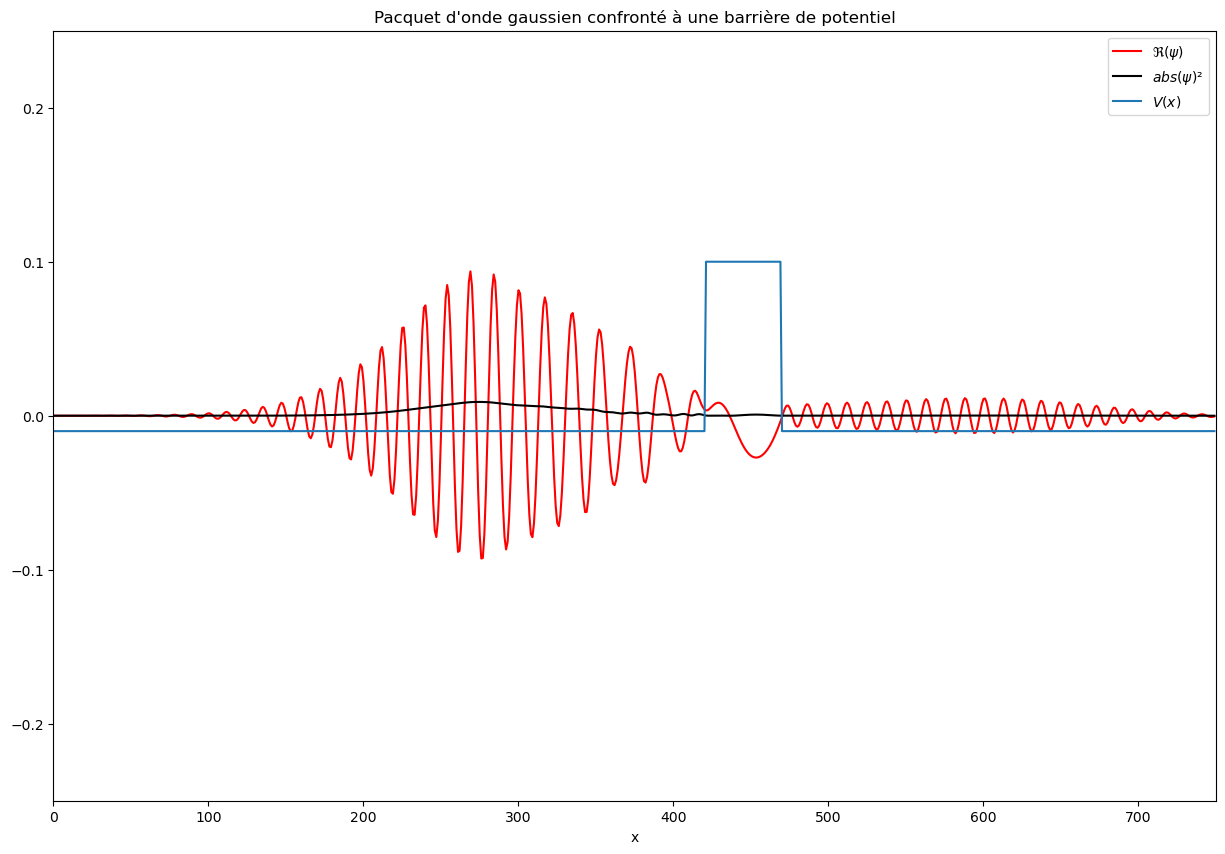

In [85]:
wavepacket = Gaussian_Wave(750,750, 420, 0.1 , 50, 100, 0.4, 15, np.linspace(0.,2500,1000))

#Psi = ani = FuncAnimation()
Psi = wavepacket.animation()
#On transforme la vidéo créé en HTML pour pouvoir la lire sur navigateur
HTML(Psi.to_html5_video())